In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [6]:
data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Exploratory Data Analysis

In [9]:
pclass_sur=data[['Pclass','Survived']].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

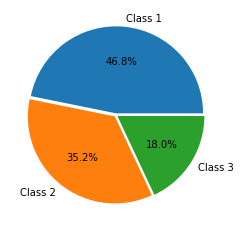

In [10]:
plt.pie(x=pclass_sur["Survived"],explode=[0.02,0.02,0.02],autopct='%1.1f%%',labels=["Class 1","Class 2","Class 3"])
plt.show()

The above chart shows that the first class passengers get more chance to survive compared to other two classes.

In [11]:
sex_sur=data[['Sex','Survived']].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)
sex_sur

,Sex,Survived
0,female,0.742038
1,male,0.188908


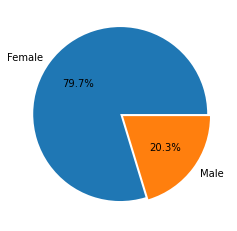

In [12]:
plt.pie(x=sex_sur["Survived"],explode=[0.02,0.02],autopct='%1.1f%%',labels=["Female","Male"])
plt.show()

The above chart shows that the survival of the female passenger is comparitively higher than male passenger.

In [13]:
sib_sur=data[['SibSp','Survived']].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)
sib_sur

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


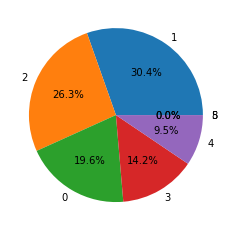

In [14]:
plt.pie(x=sib_sur["Survived"],autopct='%1.1f%%',labels=sib_sur["SibSp"])
plt.show()

From the above chart, we conclude that passenger having one sibling/Spouse have greater chance to survive even compared with the passenger with no siblings

In [15]:
par_sur=data[['Parch','Survived']].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)
par_sur

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


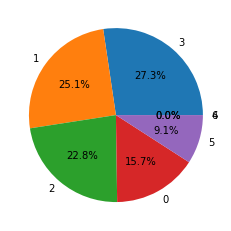

In [16]:
plt.pie(x=par_sur["Survived"],autopct='%1.1f%%',labels=par_sur["Parch"])
plt.show()

From the above chart,we can conclude that the passenger having three Children or parents having greater chance to survive

In [17]:
data=data.drop(["Name","Ticket","PassengerId","Cabin"],axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
data["Age"]=data["Age"].fillna(data["Age"].median())

In [20]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [21]:
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']=4


In [22]:
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

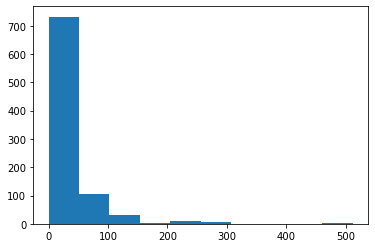

In [23]:
plt.hist(data["Fare"])
plt.show()

In [24]:
q1=data["Fare"].quantile(0.25)
q2=data["Fare"].quantile(0.50)
q3=data["Fare"].quantile(0.75)
q1,q2,q3

(7.9104, 14.4542, 31.0)

In [25]:
#we divide fare into 4 parts according to their quartiles

In [26]:
data.loc[ data['Fare'] <= q1, 'Fare'] = 0
data.loc[(data['Fare'] > q1) & (data['Fare'] <= q2), 'Fare'] = 1
data.loc[(data['Fare'] > q2) & (data['Fare'] <= q3), 'Fare'] = 2
data.loc[(data['Fare'] > q3), 'Fare'] = 3

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,0.0,S
1,1,1,female,2.0,1,0,3.0,C
2,1,3,female,1.0,0,0,1.0,S
3,1,1,female,2.0,1,0,3.0,S
4,0,3,male,2.0,0,0,1.0,S


In [28]:
data=data.dropna()

In [29]:
data=pd.get_dummies(data,drop_first=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1.0,1,0,0.0,1,0,1
1,1,1,2.0,1,0,3.0,0,0,0
2,1,3,1.0,0,0,1.0,0,0,1
3,1,1,2.0,1,0,3.0,0,0,1
4,0,3,2.0,0,0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0,0,1.0,1,0,1
887,1,1,1.0,0,0,2.0,0,0,1
888,0,3,1.0,1,2,2.0,0,0,1
889,1,1,1.0,0,0,2.0,1,0,0


## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=data.drop("Survived",axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1.0,1,0,0.0,1,0,1
1,1,2.0,1,0,3.0,0,0,0
2,3,1.0,0,0,1.0,0,0,1
3,1,2.0,1,0,3.0,0,0,1
4,3,2.0,0,0,1.0,1,0,1
...,...,...,...,...,...,...,...,...
886,2,1.0,0,0,1.0,1,0,1
887,1,1.0,0,0,2.0,0,0,1
888,3,1.0,1,2,2.0,0,0,1
889,1,1.0,0,0,2.0,1,0,0


In [32]:
y=data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

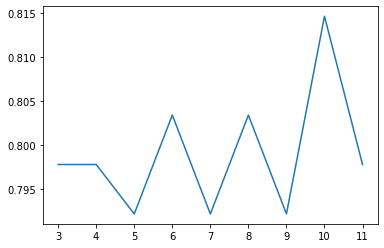

In [35]:
metric_k=[]
neighbors=np.arange(3,12)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k , metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)
max(metric_k)
plt.plot(neighbors,metric_k)
plt.xlabel='K'
plt.ylabel='Accuracy'
plt.show()

From the above chart, the accuracy score is greater for k=10

In [36]:
classifier=KNeighborsClassifier(n_neighbors=10 , metric ='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('Accuracy of KNN = ',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy of KNN =  0.8146067415730337


array([[94, 15],
       [18, 51]], dtype=int64)

## SVM

In [37]:
from sklearn.svm import SVC

In [38]:
#kernel=linear
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred1=svm_cls.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred1,y_test))
confusion_matrix(y_pred1,y_test)

Accuracy =  0.797752808988764


array([[89, 16],
       [20, 53]], dtype=int64)

In [39]:
#kernal=rbf
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred2=svm_cls1.predict(x_test)
print('Accuracy = ',accuracy_score(y_pred2,y_test))
confusion_matrix(y_pred2,y_test)

Accuracy =  0.8089887640449438


array([[92, 17],
       [17, 52]], dtype=int64)

For the given Dataset,KNN model with k value=10 have higher accuracy score.So we choose KNN as best one and for Cross validation

## Cross Validation

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [41]:
#K-fold Cross validation
Kf=KFold(10)
for train_index,test_index in Kf.split(x,y):
    print('Training Index :', train_index)
    print('Testing Index :', test_index)

Training Index : [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 3

In [42]:
cv_result=cross_val_score(classifier,x,y,cv= Kf)
cv_result

array([0.76404494, 0.78651685, 0.76404494, 0.82022472, 0.86516854,
       0.82022472, 0.80898876, 0.74157303, 0.83146067, 0.85227273])

In [43]:
np.mean(cv_result)

0.8054519918283963

In [44]:
##Stratified cross validation
Skfold=StratifiedKFold(n_splits=10)
for train_index,test_index in Skfold.split(x,y):
    print('Training Index :', train_index)
    print('Testing Index :', test_index)

Training Index : [ 81  83  84  87  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 3

In [45]:
cv_result1=cross_val_score(classifier,x,y,cv= Skfold)
cv_result1

array([0.76404494, 0.79775281, 0.74157303, 0.83146067, 0.85393258,
       0.78651685, 0.83146067, 0.75280899, 0.82022472, 0.84090909])

In [46]:
np.mean(cv_result1)

0.8020684371807969

For the given dataset,KNN model with k value=10 is greater with 0.8055 as average Accuracy using K-fold Cross validation and 0.802 using Stratified Cross Validation